# Evaluation for hyper-paramer tuning

In [27]:
import numpy as np
from knn import KNN
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
# read training.csv from the data folder
dtr = pd.read_csv('../Data/training.csv')
dtev = pd.read_csv('../Data/validation.csv')

DTR = dtr.values
DTEV = dtev.values
accuracies = []
for k in range(1, 100):
    knn_classifier = KNN(k)
    knn_classifier.train(DTR[:, :-1], DTR[:, -1])
    for p in range (1, 10):
        predictions = knn_classifier.predict(DTEV[:, :-1], p)
        accuracy = np.mean(predictions[:, 0] == DTEV[:, -1])
        print("k:", k, "p:", p, "accuracy:", accuracy)
        accuracies.append([k, p, accuracy])

print(max(accuracies, key=lambda x: x[2]))

k: 1 p: 1 accuracy: 0.70625
k: 1 p: 2 accuracy: 0.70625
k: 1 p: 3 accuracy: 0.70625
k: 1 p: 4 accuracy: 0.7104166666666667
k: 1 p: 5 accuracy: 0.7083333333333334
k: 1 p: 6 accuracy: 0.70625
k: 1 p: 7 accuracy: 0.7020833333333333
k: 1 p: 8 accuracy: 0.7020833333333333
k: 1 p: 9 accuracy: 0.7020833333333333
k: 2 p: 1 accuracy: 0.7354166666666667
k: 2 p: 2 accuracy: 0.7270833333333333
k: 2 p: 3 accuracy: 0.71875


KeyboardInterrupt: 

# Explaining curse of dimensionality in KNN
K-NN is strongly affected by the _curse of dimensionality_, since as dimensionality of data grows, data becomes increasingly sparse, leading to the loss of the concept of local neighborhoods. We now explain this phenomenon using the following example:
Assuming we have a D-dimensional hypercube (our sample space) with all sides of length 1 we sample the training data uniformly from this hypercube.
Now we want to analyze the edge length $l$ of the smallest hypercube that contains all k-nearest neighbors of a test point, with respect to 	$D$(feature dimensionality), $k$, $N$(number of training samples).
- Since the data is uniformly distributed in our hypercube (with volume $V_{tot}=1$), we can approximate the volume of the smallest hypercube that contains a neighborhood as $V_{fraction}=\frac{k}{N}V_{tot}=\frac{k}{N}$
- We can now recover $l$ from the volume as $\( \left( \frac{k}{N} \right) \)^{\frac{1}{D}}$

We now plot $l$ as a function of $D$, varying $k$ and fixing $N=1000$, in order to see how the dimensionality growth affects the edge length of the hypercube containing the neighborhood.

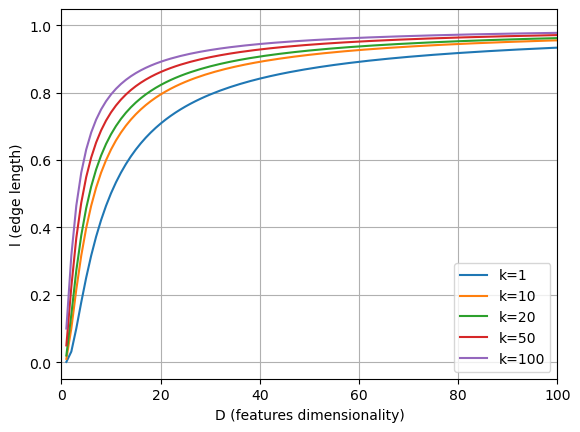

In [29]:
D = np.array([i for i in range (1, 1000)])
N = 1000
# Plot l as a function of (k/N)^(1/D)
plt.figure()
plt.xlabel("D (features dimensionality)")
plt.ylabel("l (edge length)")
for k in [1, 10, 20, 50, 100]:
    plt.plot(D, (k/N)**(1/D), label="k="+str(k))
plt.grid()
plt.legend()
plt.xlim(0, 100)
plt.show()

For example, we can see that with $k=10$ (so we use a local neighborhood that is 1% of our data), in order to obtain locality (with a rather small dimensionality of the features, $D=20$), we have to cover the 80% of the range of each input variable. We can see that our data becomes sparse, so our neighborhoods are no longer "local", and the performance of k-nn decreases dramatically. The sampling density is proportional to $N^{\frac{1}{D}}$, so if we assume that $N_1=100$ is a dense sample space for a single input problem ($D=1$), then for example for a 20-dimensional problem we would need $N_{20}=100^{20}$. We can again plot the edge length $l$ with $N=100^{20}$ to see this behavior:

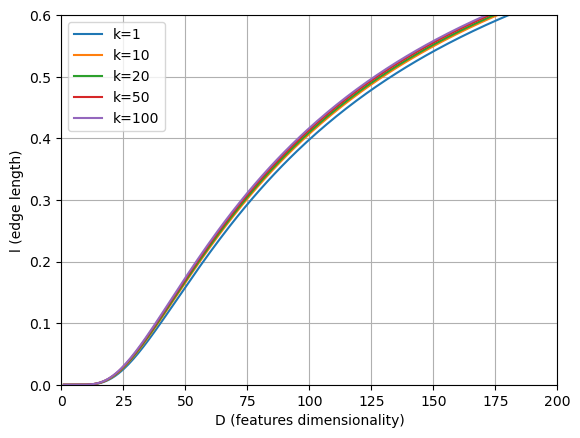

In [37]:
D = np.array([i for i in range (1, 1000)])
N = 100**20
# Plot l as a function of (k/N)^(1/D)
plt.figure()
plt.xlabel("D (features dimensionality)")
plt.ylabel("l (edge length)")
for k in [1, 10, 20, 50, 100]:
    plt.plot(D, (k/N)**(1/D), label="k="+str(k))
plt.grid()
plt.legend()
plt.xlim(0, 200)
plt.ylim(0, 0.6)
plt.show()

As we can see from the edge length corresponding to $D=20$, our neighborhood has become local again (important, we are not taking the 1% of our samples as we did in the previous plot, if we did we would again have the same problem as before), but we also see that, starting from $D=150$ our data starts to be sparse again. However, having $N=100^{20}$ in our training data is already infeasible, thus we can say that in high dimensions all feasible training samples sparsely populate the input space 